In [ ]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00


# GOMOKU ENVIRONMENT

In [ ]:
import itertools
import pygame
import random
import numpy as np

class GomokuPosition:
    dirs = (
        ((0, -1), (0, 1)), 
        ((1, 0), (-1, 0)),
        ((1, 1), (-1, -1)),
        ((1, -1), (-1, 1)),
    )

    def __init__(self, rows, cols, n_to_win, players="wb", blank="."):
        self.ply = 0
        self.rows = rows
        self.cols = cols
        self.last_move = None
        self.n_to_win = n_to_win
        self.boards = [[[0] * cols for _ in range(rows)] for i in range(2)]
        self.players = players
        self.blank = blank

    def board(self, row=None, col=None):
        if row is None and col is None:
            return self.boards[self.ply&1]
        elif col is None:
            return self.boards[self.ply&1][row]

        return self.boards[self.ply&1][row][col]

    def move(self, row, col):
        if self.in_bounds(row, col) and self.is_empty(row, col):
            self.board(row)[col] = 1
            self.ply += 1
            self.last_move = row, col
            return True

        return False

    def is_empty(self, row, col):
        return not any(board[row][col] for board in self.boards)

    def in_bounds(self, y, x):
        return y >= 0 and y < self.rows and x >= 0 and x < self.cols

    def count_from_last_move(self, dy, dx):
        if not self.last_move:
            return 0

        last_board = self.boards[(self.ply-1)&1]
        y, x = self.last_move
        run = 0

        while self.in_bounds(y, x) and last_board[y][x]:
            run += 1
            x += dx
            y += dy
        
        return run

    def just_won(self):
        return self.ply >= self.n_to_win * 2 - 1 and any(
            (self.count_from_last_move(*x) + 
             self.count_from_last_move(*y) - 1 >= self.n_to_win)
            for x, y in self.dirs
        )
        
    def is_draw(self):
        return self.ply >= self.rows * self.cols and not self.just_won()

    def last_player(self):
        if self.ply < 1:
            raise IndexError("no moves have been made")

        return self.players[(self.ply-1)&1]

    def char_for_cell(self, row, col):
        for i, char in enumerate(self.players):
            if self.boards[i][row][col]:
                # return char

                if char == 'w':
                  return 1
                else:
                  return -1
        
        # return self.blank
        return 0

    def to_grid(self):
        return [
            [self.char_for_cell(row, col) for col in range(self.cols)]
            for row in range(self.rows)
        ]

    def __repr__(self):
        return "\n".join([" ".join(row) for row in self.to_grid()])

    def __str__(self):
        return "\n".join([" ".join(row) for row in self.to_grid()])
    

    # NEW CODE



# if __name__ == "__main__":
#     pos = GomokuPosition(rows=4, cols=4, n_to_win=3)

#     while not pos.just_won() and not pos.is_draw():self.boards
#         print(pos, "\n")

#         try:
#             if not pos.move(*map(int, input("[row col] :: ").split())):
#                 print("try again")
#         except (ValueError, IndexError):
#             print("try again")

#     print(pos, "\n")
        
#     if pos.just_won():
#         print(pos.last_player(), "won")
#     else:
#         print("draw")



class Colors:
    BLACK = 0, 0, 0
    WHITE = 255, 255, 255
    BROWN = 205, 128, 0


class Gomoku:
    def __init__(
        self,
        size=60,
        piece_size=20,
        rows=15,
        cols=15,
        n_to_win=5,
        caption="Gomoku"
    ):
        self.rows = rows
        self.cols = cols
        self.w = rows * size
        self.h = cols * size
        self.size = size
        self.piece_size = piece_size
        self.half_size = size // 2
        self.matrix = rows * cols

        self.n_to_win = n_to_win

        pygame.init()
        # pygame.display.set_caption(caption)
        # self.screen = pygame.display.set_mode((self.w, self.h))
        # self.screen.fill(Colors.WHITE)
        self.player_colors = {"w": Colors.WHITE, "b": Colors.BLACK}
        self.player_names = {"w": "White", "b": "Black"}

        self.reset()
        # self.board = GomokuPosition(rows, cols, n_to_win)
        # self.draw_board()

    # FOR AI
    def reset(self):
        self.board = GomokuPosition(self.rows, self.cols, self.n_to_win)
        self.draw_board()




    #ENDS HERE


    def row_lines(self):
        half = self.half_size

        for y in range(half, self.h - half + self.size, self.size):
            yield (half, y), (self.w - half, y)

    def col_lines(self):
        half = self.half_size

        for x in range(half, self.w - half + self.size, self.size):
            yield (x, half), (x, self.h - half)
        
    def draw_background(self):
        rect = pygame.Rect(0, 0, self.w, self.h)
        # pygame.draw.rect(self.screen, Colors.BROWN, rect)

    def draw_lines(self):
        lines = itertools.chain(self.col_lines(), self.row_lines())

        # for start, end in lines:
        #     pygame.draw.line(
        #         self.screen, 
        #         Colors.BLACK, 
        #         start, 
        #         end, 
        #         width=2
        #     )

    def draw_board(self):
        self.draw_background()
        self.draw_lines()
        
    def draw_piece(self, row, col):
        player = self.board.last_player()
        circle_pos = (
           col * self.size + self.half_size, 
           row * self.size + self.half_size,
        )
        pygame.draw.circle(
           self.screen, 
           self.player_colors[player], 
           circle_pos, 
           self.piece_size
        )

    def show_outcome(self):
        player = self.player_names[self.board.last_player()]
        msg = "draw!" if self.board.is_draw() else f"{player} wins!"
        font_size = self.w // 10
        font = pygame.font.Font("freesansbold.ttf", font_size)
        label = font.render(msg, True, Colors.WHITE, Colors.BLACK)
        x = self.w // 2 - label.get_width() // 2
        y = self.h // 2 - label.get_height() // 2
        self.screen.blit(label, (x, y))

    def exit_on_click(self):
        while True:
            for event in pygame.event.get():
                if (event.type == pygame.QUIT or 
                        event.type == pygame.MOUSEBUTTONDOWN):
                    pygame.quit()
                    return

    def make_move(self, x, y):
        col = x // self.size
        row = y // self.size
        print(row,col)
        if self.board.move(row, col):
            self.draw_piece(row, col)
        
    def play(self):
        pygame.time.Clock().tick(10)
        # self.draw_board()
        pygame.display.update()
        while not self.board.just_won() and not self.board.is_draw():
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
                elif event.type == pygame.MOUSEBUTTONDOWN:
                    self.make_move(*event.pos)
                    pygame.display.update()                        
                    print(self.board)
                    print(self.board.last_player())
                    print(self.board.just_won())

        self.show_outcome()
        pygame.display.update()
        self.exit_on_click()

    def play_step(self,act):
          
        # for event in pygame.event.get():
        #     if event.type == pygame.QUIT:
        #         pygame.quit()
        #         return
        
        # TODO AI TURN
        # if self.board.last_player() != ai:
        # move        
        # self.action(act)
        
        done = False
        # reward = -1

        x, y = act

        # print(self.board.is_empty(x,y))

        if self.board.is_empty(x,y):

            self.action((x,y))
            reward = -1

        else:
            reward = -20        

        if self.board.just_won():
            reward = 100
            done = True

        if self.board.is_draw():
            reward = 0
            done = True

        return reward, done

    def Board(self):
        return np.asarray(self.board.to_grid())

    def action(self, act):
        x, y = act
        if self.board.move(x, y):
            player = self.board.last_player()
            circle_pos = (
            y * self.size + self.half_size, 
            x * self.size + self.half_size,
            )
            # pygame.draw.circle(
            # self.screen, 
            # self.player_colors[player], 
            # circle_pos, 
            # self.piece_size
            # )

        # self.make_move(x, y)

    def index_2D_to_1D(self, act):
      x, y = act
      return y + self.cols*x
      
    def index_1D_to_2D(self, index):
      y = index % self.cols
      x = int(index / self.cols)

      return x,y


if __name__ == "__main__":
    game = Gomoku(rows=5, cols=5, n_to_win=3)
    # game.action(1,5)
    # game.action(2,5)
    # game.action(1,4)
    # game.action(2,4)
    # game.action(1,3)
    # game.action(2,3)
    # game.reset()
    print(game.Board())
    # game.play()

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [ ]:
# print(game.play_step((3,4)))
# print(game.play_step((2,4)))
# print(game.Board())
random.randint(1,3)

2

In [ ]:
game.matrix

100

In [ ]:
# move = (9,9)

a = game.Board()
a[4][5] = 1
print(a)

a = a.flatten()
print(a)
print('i = ',np.argmax(a) )# 15

i = game.index_2D_to_1D((4,5))
print('ii = ',i)
# i = 6 + game.cols*4

x, y = game.index_1D_to_2D(i)
# x = i % game.cols
# y = int(i / game.cols)

print(x,y)

# game.action(move)
# print(game.Board())

# random.randint(0, game.cols)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
i =  45
ii =  45
4 5


In [ ]:
print(game.play_step((1,2)))
print(np.asarray(game.Board()))


True
(-1, False)
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


# HELPER PLOT FUNCTION

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

plt.ion()

def plot(scores, mean_scores):
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Number of Games')
    # plt.ylabel('Score')
    plt.ylabel('Move Taken')
    plt.plot(scores, label = 'Move taken/ game')
    plt.plot(mean_scores, label = 'Average move taken/ game')


    # plt.plot(reward, label = 'reward')


    plt.ylim(ymin=0)
    plt.legend()
    plt.text(len(scores)-1, scores[-1], str(scores[-1]))
    plt.text(len(mean_scores)-1, mean_scores[-1], str(mean_scores[-1]))

    # plt.text(len(reward)-1, reward[-1], str(reward[-1]))

    plt.show(block=False)
    plt.pause(.1)

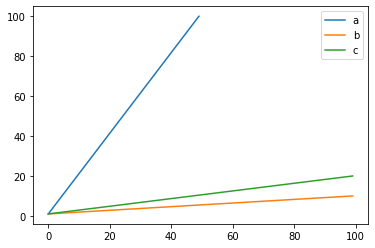

In [ ]:
a = np.linspace(1,100)
b = np.linspace(1,10,100)
c = np.linspace(1,20,100)
plt.plot(a, label = 'a')
plt.plot(b, label = 'b')
plt.plot(c, label = 'c')
plt.legend()

# TRAINER FUNCTION

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os

class Linear_QNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 128)
        self.linear3 = nn.Linear(128,64)
        self.linearOut = nn.Linear(64, output_size)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linearOut(x)
        return x

    def save(self, file_name='model.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)


class QTrainer:
    def __init__(self, model, lr, gamma):
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.optimizer = optim.Adam(model.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()

    def train_step(self, state, action, reward, next_state, done):
        state = torch.tensor(state, dtype=torch.float)
        next_state = torch.tensor(next_state, dtype=torch.float)
        action = torch.tensor(action, dtype=torch.long)
        reward = torch.tensor(reward, dtype=torch.float)
        # (n, x)

        if len(state.shape) == 1:
            # (1, x)
            state = torch.unsqueeze(state, 0)
            next_state = torch.unsqueeze(next_state, 0)
            action = torch.unsqueeze(action, 0)
            reward = torch.unsqueeze(reward, 0)
            done = (done, )

        # 1: predicted Q values with current state
        pred = self.model(state)

        target = pred.clone()
        for idx in range(len(done)):
            Q_new = reward[idx]
            if not done[idx]:
                Q_new = reward[idx] + self.gamma * torch.max(self.model(next_state[idx]))

            target[idx][torch.argmax(action[idx]).item()] = Q_new
    
        # 2: Q_new = r + y * max(next_predicted Q value) -> only do this if not done
        # pred.clone()
        # preds[argmax(action)] = Q_new
        self.optimizer.zero_grad()
        loss = self.criterion(target, pred)
        loss.backward()

        self.optimizer.step()

# AGENT AI

<Figure size 432x288 with 0 Axes>

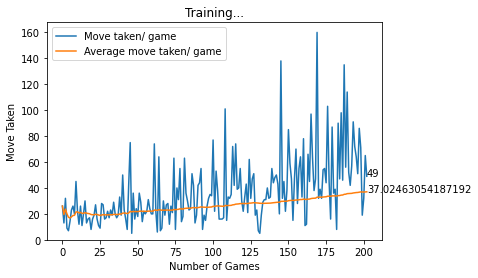

-409.9950738916256
<built-in method size of Tensor object at 0x7f0df2f845e0>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df37fb220>
<built-in method size of Tensor object at 0x7f0df37fb220>
<built-in method size of Tensor object at 0x7f0df37fb220>
<built-in method size of Tensor object at 0x7f0df33f46d0>
<built-in method size of Tensor object at 0x7f0df34f3ae0>
<built-in method size of Tensor object at 0x7f0df34f3ae0>
<built-in method size of Tensor object at 0x7f0df3197310>
<built-in method size of Tensor object at 0x7f0df3197310>
<built-in method size of Tensor object at 0x7f0df362b4f0>
<built-in method size of Tensor object at 0x7f0df362b4f0>
<built-in method size of Tensor object at 0x7f0df34f3

In [ ]:
import torch
import random
from collections import deque

MAX_MEMORY = 100_000
BATCH_SIZE = 1000
LR = 0.001

class Agent:

    def __init__(self):
        self.n_games = 0
        self.epsilon = 0 # randomness
        self.gamma = 0.9 # discount rate
        self.memory = deque(maxlen=MAX_MEMORY) # popleft()
        # self.model = Linear_QNet(11, 256, 3)
        self.model = Linear_QNet(game.matrix, 256, game.matrix)
        self.trainer = QTrainer(self.model, lr=LR, gamma=self.gamma)


    def get_state(self, game):
        state = game.Board()
        state = state.reshape(-1)
        return state

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done)) # popleft if MAX_MEMORY is reached

        if len(self.memory) > BATCH_SIZE:
            mini_sample = random.sample(self.memory, BATCH_SIZE) # list of tuples
        else:
            mini_sample = self.memory

        states, actions, rewards, next_states, dones = zip(*mini_sample)
        self.trainer.train_step(states, actions, rewards, next_states, dones)
        #for state, action, reward, nexrt_state, done in mini_sample:
        #    self.trainer.train_step(state, action, reward, next_state, done)

    def train_short_memory(self, state, action, reward, next_state, done):
        self.trainer.train_step(state, action, reward, next_state, done)

    def train_long_memory(self):
        if len(self.memory) > BATCH_SIZE:
            mini_sample = random.sample(self.memory, BATCH_SIZE) # list of tuples
        else:
            mini_sample = self.memory

        states, actions, rewards, next_states, dones = zip(*mini_sample)
        self.trainer.train_step(states, actions, rewards, next_states, dones)
        #for state, action, reward, nexrt_state, done in mini_sample:
        #    self.trainer.train_step(state, action, reward, next_state, done)        

    def get_action(self, state):
        # random moves: tradeoff exploration / exploitation
        self.epsilon = 300 - self.n_games
        final_move = (0,0)
        if random.randint(0, 400) < self.epsilon:
            x = random.randint(0, game.rows-1)
            y = random.randint(0, game.cols-1)
            final_move = (x,y)
        else:
            state0 = torch.tensor(state, dtype=torch.float)
            print(state0.size)
            prediction = self.model(state0)

            #TODO 

            # x = random.randint(0, game.rows)
            # y = random.randint(0, game.cols)
            
            i = torch.argmax(prediction).item() # action in 1D
            x, y = game.index_1D_to_2D(i)       # convert to 2D
            final_move = (x,y)

        return final_move


def train():
    # plot_scores = []
    # plot_mean_scores = []
    # total_score = 0
    record = 150
    plot_reward = []
    total_reward = 0

    move_taken = 0
    plot_move_taken = []
    plot_average_move_taken = []
    total_move_taken = 0
    game = Gomoku(rows=5, cols=5, n_to_win=3)

    agent = Agent()
    while True:
        # get old state
        state_old = agent.get_state(game)
        # print(state_old)

        # get move
        final_move = agent.get_action(state_old)

        # perform move and get new state
        # print(final_move)
        reward, done = game.play_step(final_move)
        state_new = agent.get_state(game)

        # print Board
        # print('\n \nLast board:')
        # print(game.Board())

        total_reward += reward

        move_taken += 1

        # train short memory
        agent.train_short_memory(state_old, final_move, reward, state_new, done)

        # remember
        agent.remember(state_old, final_move, reward, state_new, done)

        if done:
            # train long memory, plot result
            game.reset()
            agent.n_games += 1
            agent.train_long_memory()

            if move_taken < record:
                 record = move_taken
                 agent.model.save()

            # if agent.n_games % 40 == 0:
            #   agent.model.save()

            print('Game', agent.n_games)

            # plot_scores.append(score)
            # total_score += score
            # mean_score = total_score / agent.n_games
            # plot_mean_scores.append(mean_score)
            # plot(plot_scores, plot_mean_scores)


            # plot_reward.append(total_reward)
            avg_reward = total_reward / agent.n_games

            plot_move_taken.append(move_taken)
            total_move_taken += move_taken
            mean_move_taken = total_move_taken / agent.n_games
            plot_average_move_taken.append(mean_move_taken)
            plot(plot_move_taken, plot_average_move_taken)

            print(avg_reward)

            move_taken = 0


            

            
            
            
            # plot(plot_reward)

train()

In [ ]:
state = np.zeros(100).flatten()
state = torch.tensor(state, dtype=torch.float)
torch.unsqueeze(state, 0)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]])

In [ ]:
agent = Agent()
game = Gomoku(rows=10, cols=10, n_to_win=4)
state_old = agent.get_state(game)
game.matrix

100

In [ ]:
model = Linear_QNet(game.matrix, 256, game.matrix)
model.eval()

Linear_QNet(
  (linear1): Linear(in_features=100, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=100, bias=True)
)

In [ ]:
x = torch.randn((1, 100))

In [ ]:
x.size()

torch.Size([1, 100])

In [ ]:
model.forward(x)

tensor([[ 6.1479e-02,  2.3222e-01, -9.6386e-02,  2.7381e-01,  2.2843e-02,
          9.1667e-02, -9.4727e-02,  1.6564e-01, -1.0345e-01,  1.1476e-01,
         -8.2631e-02,  5.1924e-02,  3.5577e-01, -9.1791e-02, -1.9170e-02,
          8.2385e-02, -6.2427e-02,  2.3907e-01, -2.3074e-03,  3.4585e-01,
         -4.4027e-02, -5.2007e-04,  2.5336e-01, -3.2563e-01,  2.6584e-01,
          1.3814e-02, -1.2119e-02, -8.5895e-02,  5.5795e-02, -3.5778e-01,
          2.5350e-02,  3.1309e-03, -3.2794e-05,  9.2762e-02,  7.7153e-02,
          1.3799e-01,  2.2865e-01, -1.9568e-01,  3.0605e-02,  1.1152e-02,
          6.8755e-02, -1.1900e-01,  3.7784e-01,  5.9292e-02, -3.1069e-02,
          3.6335e-02, -1.0900e-01,  3.3591e-01,  4.2358e-01,  3.3445e-01,
          1.4074e-01,  2.3196e-01, -8.7072e-02,  6.1564e-02, -2.0861e-01,
          1.0107e-02, -9.2543e-02,  2.6504e-01, -3.8647e-01,  1.2467e-01,
         -1.3769e-01, -3.2973e-02,  1.8019e-01, -2.5623e-01,  2.3271e-01,
         -6.2199e-02, -2.7142e-01, -9.

In [ ]:
y = model.forward(x)

In [ ]:
y.size()

torch.Size([1, 100])

tensor([[ 6.1479e-02,  2.3222e-01, -9.6386e-02,  2.7381e-01,  2.2843e-02,
          9.1667e-02, -9.4727e-02,  1.6564e-01, -1.0345e-01,  1.1476e-01,
         -8.2631e-02,  5.1924e-02,  3.5577e-01, -9.1791e-02, -1.9170e-02,
          8.2385e-02, -6.2427e-02,  2.3907e-01, -2.3074e-03,  3.4585e-01,
         -4.4027e-02, -5.2007e-04,  2.5336e-01, -3.2563e-01,  2.6584e-01,
          1.3814e-02, -1.2119e-02, -8.5895e-02,  5.5795e-02, -3.5778e-01,
          2.5350e-02,  3.1309e-03, -3.2794e-05,  9.2762e-02,  7.7153e-02,
          1.3799e-01,  2.2865e-01, -1.9568e-01,  3.0605e-02,  1.1152e-02,
          6.8755e-02, -1.1900e-01,  3.7784e-01,  5.9292e-02, -3.1069e-02,
          3.6335e-02, -1.0900e-01,  3.3591e-01,  4.2358e-01,  3.3445e-01,
          1.4074e-01,  2.3196e-01, -8.7072e-02,  6.1564e-02, -2.0861e-01,
          1.0107e-02, -9.2543e-02,  2.6504e-01, -3.8647e-01,  1.2467e-01,
         -1.3769e-01, -3.2973e-02,  1.8019e-01, -2.5623e-01,  2.3271e-01,
         -6.2199e-02, -2.7142e-01, -9.

tensor(1.)